In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
file = open('/content/blue_castle.txt','r',encoding='utf-8')

In [3]:
#store file in list
lines = []
for i in file:
     lines.append(i)

#Convert list to string
data = ""
for i in lines:
    data = '  '. join(lines)

# replace unnecessary stuff with space
data = data.replace('\n', '').replace('\r', '').replace('\ufeff', '').replace('“','').replace('”','')  #new line, carriage return, unicode character --> replace by space

#remove unnecessary spaces
data = data.split()
data = ' '.join(data)
data[:500]

'The Project Gutenberg eBook of The Blue Castle, by Lucy Maud Montgomery This eBook is for the use of anyone anywhere in the United States and most other parts of the world at no cost and with almost no restrictions whatsoever. You may copy it, give it away or re-use it under the terms of the Project Gutenberg License included with this eBook or online at www.gutenberg.org. If you are not located in the United States, you will have to check the laws of the country where you are located before usi'

In [4]:
data = data[:600000]

In [5]:
len(data)

402906

In [6]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer

In [7]:
tokenizer = Tokenizer()

In [8]:
tokenizer.fit_on_texts([data])

In [27]:
#saving the tokenizer for predict function
import pickle
pickle.dump(tokenizer,open('tokenizer.pkl','wb'))

In [10]:
sequence_data = tokenizer.texts_to_sequences([data])[0]
sequence_data[:15]

[1, 112, 97, 587, 4, 1, 94, 147, 58, 2383, 2384, 1818, 51, 587, 42]

In [11]:
len(sequence_data)

72052

In [12]:
vocab_size = len(tokenizer.word_index) + 1
print(vocab_size)

8413


In [13]:
sequences = []
for i in range(3,len(sequence_data)):
  words = sequence_data[i-3:i+1]
  sequences.append(words)

print("the length of sequences are: ",len(sequences))
sequences = np.array(sequences)
sequences[:10]

the length of sequences are:  72049


array([[   1,  112,   97,  587],
       [ 112,   97,  587,    4],
       [  97,  587,    4,    1],
       [ 587,    4,    1,   94],
       [   4,    1,   94,  147],
       [   1,   94,  147,   58],
       [  94,  147,   58, 2383],
       [ 147,   58, 2383, 2384],
       [  58, 2383, 2384, 1818],
       [2383, 2384, 1818,   51]])

In [14]:
x = []
y = []
for i in sequences:
  x.append(i[0:3])
  y.append(i[3])

x = np.array(x)
y = np.array(y)

In [15]:
print("Data: ",x[:10])
print("Response: ",y[:10])

Data:  [[   1  112   97]
 [ 112   97  587]
 [  97  587    4]
 [ 587    4    1]
 [   4    1   94]
 [   1   94  147]
 [  94  147   58]
 [ 147   58 2383]
 [  58 2383 2384]
 [2383 2384 1818]]
Response:  [ 587    4    1   94  147   58 2383 2384 1818   51]


In [16]:

from keras.utils import to_categorical
y = to_categorical(y,num_classes=vocab_size)
y[:5]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.optimizers import Adam

In [18]:
model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=10, input_length=3))

model.add(LSTM(128, return_sequences=True))

model.add(LSTM(500))

model.add(Dense(500, activation="relu"))

model.add(Dense(vocab_size, activation="softmax"))

model.build(input_shape=(None, 3))

In [19]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 3, 10)          │        84,130 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 3, 128)         │        71,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 500)            │     1,258,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 500)            │       250,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 8413)           │     4,214,913 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,878,711 (22.43 MB)

 Trainable params: 5,878,711 (22.43 MB)

 Non-trainable params: 0 (0.00 B)

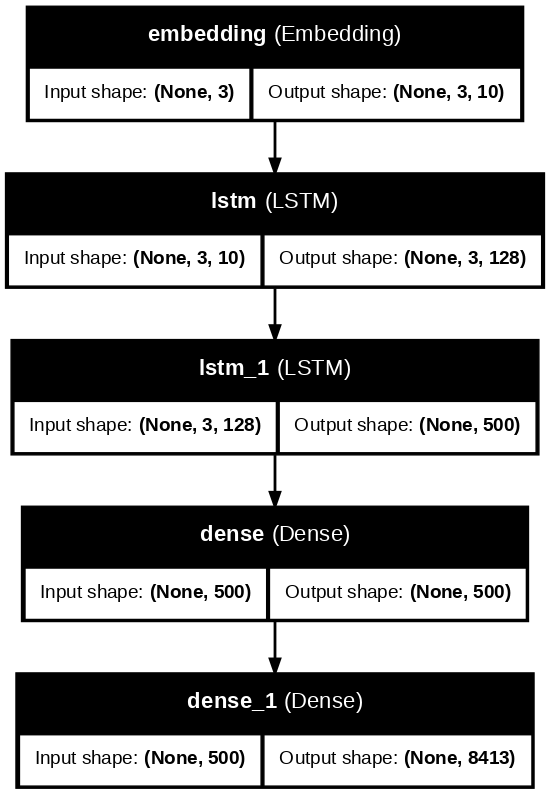

In [20]:
from tensorflow.keras.utils import plot_model

plot_model(
    model,
    to_file="plot.png",
    show_shapes=True,
    show_layer_names=True,
    dpi=100)


In [21]:
model.compile(loss="categorical_crossentropy", optimizer=Adam(learning_rate=0.001))

In [22]:
history = model.fit(x, y, epochs=20, batch_size=64, shuffle=True)

Epoch 1/20
1126/1126 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - loss: 7.0996
Epoch 2/20
1126/1126 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 6.4572
Epoch 3/20
1126/1126 ━━━━━━━━━━━━━━━━━━━━ 12s 11ms/step - loss: 6.0520
Epoch 4/20
1126/1126 ━━━━━━━━━━━━━━━━━━━━ 12s 10ms/step - loss: 5.7233
Epoch 5/20
1126/1126 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - loss: 5.4131
Epoch 6/20
1126/1126 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 5.1701
Epoch 7/20
1126/1126 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 4.9570
Epoch 8/20
1126/1126 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 4.7301
Epoch 9/20
1126/1126 ━━━━━━━━━━━━━━━━━━━━ 21s 10ms/step - loss: 4.4982
Epoch 10/20
1126/1126 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - loss: 4.2711
Epoch 11/20
1126/1126 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - loss: 4.0262
Epoch 12/20
1126/1126 ━━━━━━━━━━━━━━━━━━━━ 21s 10ms/step - loss: 3.7723
Epoch 13/20
1126/1126 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 3.5115
Epoch 14/20
1126/1126 ━━━━━━━━━━━━━━━━━━━━ 21s 10ms/step - loss: 3.2722
E

In [23]:
import pickle
pickle.dump(model,open('next_word.h5','wb'))

In [26]:
def Predict_Next_Words(model, tokenizer, text):

  sequence = tokenizer.texts_to_sequences([text])
  sequence = np.array(sequence)
  preds = np.argmax(model.predict(sequence))
  predict_word = ""

  for key, value in tokenizer.word_index.items():
    if value == preds:
      predicted_word = key
      break

  print(predicted_word)
  return predicted_word


while(True):
  text = input("Enter your line:")

  if text == "0":
    print("Execution completed....")
    break

  else:
    try:
      text = text.split(" ")
      text = text[-3:]
      print(text)

      Predict_Next_Words(model, tokenizer, text)


    except Exception as e:
       print("Error occured: ",e)
       continue

Enter your line:She got Cousin Stickles
['got', 'Cousin', 'Stickles']
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
what
Enter your line:She got Cousin Stickles what
['Cousin', 'Stickles', 'what']
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
she
Enter your line:She got Cousin Stickles what she
['Stickles', 'what', 'she']
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
intended
Enter your line:0
Execution completed....


In [25]:
# She got Cousin Stickles